In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
url = "online_retail_II.xlsx"
df = pd.read_excel(url, sheet_name="Year 2009-2010")
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None


In [5]:
print("\nFirst Few Rows:")
print(df.head())


First Few Rows:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [6]:
df.dropna(inplace=True)
X = df.groupby('Customer ID').agg({'Quantity': 'sum', 'Price': 'mean'}).reset_index()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['Quantity', 'Price']])

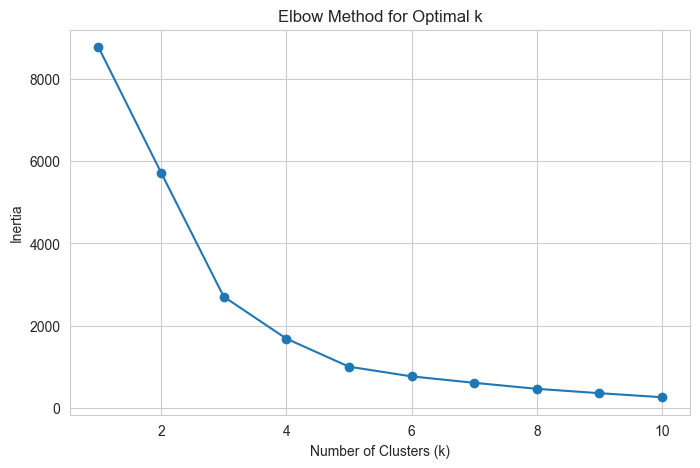

In [8]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [9]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_scaled)

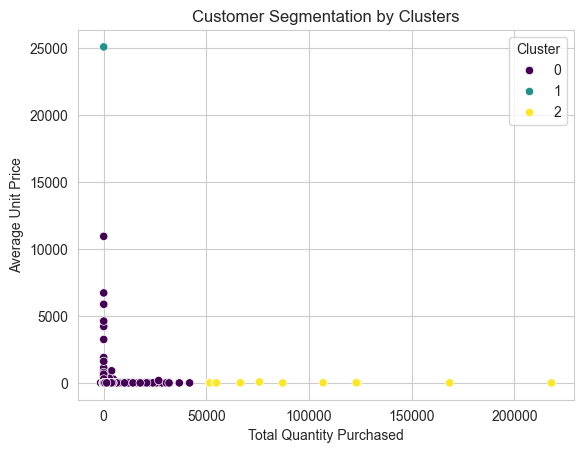

In [13]:
sns.scatterplot(data=X, x='Quantity', y='Price', hue='Cluster',
palette='viridis')
plt.title('Customer Segmentation by Clusters')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Average Unit Price')
plt.show()

In [11]:
cluster_summary = X.groupby('Cluster').agg({'Quantity': 'mean', 'Price': 'mean', 'Customer ID': 'count'})
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
             Quantity         Price  Customer ID
Cluster                                         
0          948.602975     17.765198         4370
1           -1.000000  25111.090000            1
2        98487.083333      9.637918           12


In [ ]:
1. Explain the Elbow Method and its role in determining the optimal number of clusters (k).
    The Elbow method works to help determine the optimal number of clusters by comparing distances to the average points. By taking the inflection point in the curve we assume that this should be the optimal point. This appears to be the point at where the stops rapidly decreasing.
2. What does the cluster summary provide, and how is it useful for interpretation?
    The cluster summary provides information about the 3 clusters we created with the data. It helps to show the mean quantity and price of a cluster, it also shows that cluster 1 consists of a single item that probably shouldve been removed in preprocessing given its a negative value.
3. What marketing strategies could be applied to customers in the identified clusters?
    By using the clusters we can identify the average money spent and items purchased by that group, we could increase the price of the items to see if customers might pay more for the same items, or we could group items together in bulk to see if customers will buy more of the items they want. there is a lot of potential options to entice the customers but we have 2 groups that spend on average 17.7 or 9.6 dollars so we could look at that and try to find a way to increase the average by raising the minimum spent.   